# Importing Libraries

In [76]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt 
    import seaborn as sns 
    import folium  
    from folium import plugins
    import plotly.express as px  
    import osmnx as ox 
    import networkx as nx  
    from ortools.constraint_solver import pywrapcp  
    from ortools.constraint_solver import routing_enums_pb2
    import sklearn
    print("Successfully Imported Libraries")
except ModuleNotFoundError as mnf:
    print("Error Importing module: {} ".format(mnf.name))
    print("Details: {}".format(mnf))
    exit(1)

Successfully Imported Libraries


# Read Data

In [77]:
try:
    data=pd.read_csv("../data/directory.csv")
    print("Successfully Loaded data set")
except FileNotFoundError as fnf:
    print("Error Loading dataset")
    print("File Not found!")

Successfully Loaded data set


# EDA

In [78]:
data.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [79]:
#we select a specific country for our case study
data.Country.value_counts()

Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
      ...  
CW        3
AW        3
MC        2
LU        2
AD        1
Name: count, Length: 73, dtype: int64

In [80]:
#we select Germany
data[data["Country"] == "DE"]

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
4888,Starbucks,40948-102601,Stern Center Potsdam,Company Owned,NUTHESTRAßE / STERNSTRAßE,POTSDAM,BB,DE,14480,4933160037192,GMT+1:00 Europe/Berlin,13.13,52.37
4889,Starbucks,40947-102602,Brandenburgerstrasse 28a,Company Owned,"BRANDENBURGER STRAß 28A, ALEXA",POTSDAM,BB,DE,14467,493312019631,GMT+1:00 Europe/Berlin,13.06,52.40
4890,Starbucks,40971-108228,Alexa Shopping Centre,Company Owned,GRUNERSTRASSE 20,BERLIN,BE,DE,10719,493027591054,GMT+1:00 Europe/Berlin,13.42,52.52
4891,Starbucks,40949-103780,Potsdamer Platz 5,Company Owned,"POTSDAMER PLATZ 5, Sony-Center",BERLIN,BE,DE,10785,493025358285,GMT+1:00 Europe/Berlin,13.38,52.51
4892,Starbucks,18524-185885,Sony-Center,Company Owned,Neue Potsdamer Str. 2,Berlin,BE,DE,10785,3023003314,GMT+1:00 Europe/Berlin,13.37,52.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,Starbucks,20604-161924,Dresden Hauptbahnhof,Company Owned,Wiener Platz 4,Dresden,SN,DE,1069,4935142776967,GMT+1:00 Europe/Berlin,13.73,51.04
5044,Starbucks,1197-133645,Centrum Galerie,Company Owned,Prager Strasse 15,Dresden,SN,DE,1069,493514850950,GMT+1:00 Europe/Berlin,13.74,51.04
5045,Starbucks,17860-181705,Leipzig Hauptbahnhof,Company Owned,Willy-Brandt-Platz 7,Leipzig,SN,DE,4109,4934196298335,GMT+1:00 Europe/Berlin,12.38,51.34
5046,Starbucks,40999-115960,Grimmaische Strasse 14,Company Owned,GRIMMAISCHE STRASSE 14,LEIPZIG,SN,DE,4109,493412251481,GMT+1:00 Europe/Berlin,12.38,51.34


In [81]:
de_data=data[data["Country"]=="DE"].reset_index()

In [82]:
de_data.reset_index(drop=False,inplace=True)
de_data

,level_0,index,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,0,4888,Starbucks,40948-102601,Stern Center Potsdam,Company Owned,NUTHESTRAßE / STERNSTRAßE,POTSDAM,BB,DE,14480,4933160037192,GMT+1:00 Europe/Berlin,13.13,52.37
1,1,4889,Starbucks,40947-102602,Brandenburgerstrasse 28a,Company Owned,"BRANDENBURGER STRAß 28A, ALEXA",POTSDAM,BB,DE,14467,493312019631,GMT+1:00 Europe/Berlin,13.06,52.40
2,2,4890,Starbucks,40971-108228,Alexa Shopping Centre,Company Owned,GRUNERSTRASSE 20,BERLIN,BE,DE,10719,493027591054,GMT+1:00 Europe/Berlin,13.42,52.52
3,3,4891,Starbucks,40949-103780,Potsdamer Platz 5,Company Owned,"POTSDAMER PLATZ 5, Sony-Center",BERLIN,BE,DE,10785,493025358285,GMT+1:00 Europe/Berlin,13.38,52.51
4,4,4892,Starbucks,18524-185885,Sony-Center,Company Owned,Neue Potsdamer Str. 2,Berlin,BE,DE,10785,3023003314,GMT+1:00 Europe/Berlin,13.37,52.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,5043,Starbucks,20604-161924,Dresden Hauptbahnhof,Company Owned,Wiener Platz 4,Dresden,SN,DE,1069,4935142776967,GMT+1:00 Europe/Berlin,13.73,51.04
156,156,5044,Starbucks,1197-133645,Centrum Galerie,Company Owned,Prager Strasse 15,Dresden,SN,DE,1069,493514850950,GMT+1:00 Europe/Berlin,13.74,51.04
157,157,5045,Starbucks,17860-181705,Leipzig Hauptbahnhof,Company Owned,Willy-Brandt-Platz 7,Leipzig,SN,DE,4109,4934196298335,GMT+1:00 Europe/Berlin,12.38,51.34
158,158,5046,Starbucks,40999-115960,Grimmaische Strasse 14,Company Owned,GRIMMAISCHE STRASSE 14,LEIPZIG,SN,DE,4109,493412251481,GMT+1:00 Europe/Berlin,12.38,51.34


In [83]:

de_data.rename(columns={"level_0": "id"},inplace=True)

In [84]:
de_data

,id,index,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,0,4888,Starbucks,40948-102601,Stern Center Potsdam,Company Owned,NUTHESTRAßE / STERNSTRAßE,POTSDAM,BB,DE,14480,4933160037192,GMT+1:00 Europe/Berlin,13.13,52.37
1,1,4889,Starbucks,40947-102602,Brandenburgerstrasse 28a,Company Owned,"BRANDENBURGER STRAß 28A, ALEXA",POTSDAM,BB,DE,14467,493312019631,GMT+1:00 Europe/Berlin,13.06,52.40
2,2,4890,Starbucks,40971-108228,Alexa Shopping Centre,Company Owned,GRUNERSTRASSE 20,BERLIN,BE,DE,10719,493027591054,GMT+1:00 Europe/Berlin,13.42,52.52
3,3,4891,Starbucks,40949-103780,Potsdamer Platz 5,Company Owned,"POTSDAMER PLATZ 5, Sony-Center",BERLIN,BE,DE,10785,493025358285,GMT+1:00 Europe/Berlin,13.38,52.51
4,4,4892,Starbucks,18524-185885,Sony-Center,Company Owned,Neue Potsdamer Str. 2,Berlin,BE,DE,10785,3023003314,GMT+1:00 Europe/Berlin,13.37,52.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,5043,Starbucks,20604-161924,Dresden Hauptbahnhof,Company Owned,Wiener Platz 4,Dresden,SN,DE,1069,4935142776967,GMT+1:00 Europe/Berlin,13.73,51.04
156,156,5044,Starbucks,1197-133645,Centrum Galerie,Company Owned,Prager Strasse 15,Dresden,SN,DE,1069,493514850950,GMT+1:00 Europe/Berlin,13.74,51.04
157,157,5045,Starbucks,17860-181705,Leipzig Hauptbahnhof,Company Owned,Willy-Brandt-Platz 7,Leipzig,SN,DE,4109,4934196298335,GMT+1:00 Europe/Berlin,12.38,51.34
158,158,5046,Starbucks,40999-115960,Grimmaische Strasse 14,Company Owned,GRIMMAISCHE STRASSE 14,LEIPZIG,SN,DE,4109,493412251481,GMT+1:00 Europe/Berlin,12.38,51.34


In [85]:
#select a random center/ depot
de_data["base"] = de_data["id"].apply(lambda x:1 if x == 80 else 0)
start = de_data[de_data["base"]==1][["Latitude","Longitude"]].values[0]

In [86]:
de_data

,id,index,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,base
0,0,4888,Starbucks,40948-102601,Stern Center Potsdam,Company Owned,NUTHESTRAßE / STERNSTRAßE,POTSDAM,BB,DE,14480,4933160037192,GMT+1:00 Europe/Berlin,13.13,52.37,0
1,1,4889,Starbucks,40947-102602,Brandenburgerstrasse 28a,Company Owned,"BRANDENBURGER STRAß 28A, ALEXA",POTSDAM,BB,DE,14467,493312019631,GMT+1:00 Europe/Berlin,13.06,52.40,0
2,2,4890,Starbucks,40971-108228,Alexa Shopping Centre,Company Owned,GRUNERSTRASSE 20,BERLIN,BE,DE,10719,493027591054,GMT+1:00 Europe/Berlin,13.42,52.52,0
3,3,4891,Starbucks,40949-103780,Potsdamer Platz 5,Company Owned,"POTSDAMER PLATZ 5, Sony-Center",BERLIN,BE,DE,10785,493025358285,GMT+1:00 Europe/Berlin,13.38,52.51,0
4,4,4892,Starbucks,18524-185885,Sony-Center,Company Owned,Neue Potsdamer Str. 2,Berlin,BE,DE,10785,3023003314,GMT+1:00 Europe/Berlin,13.37,52.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,5043,Starbucks,20604-161924,Dresden Hauptbahnhof,Company Owned,Wiener Platz 4,Dresden,SN,DE,1069,4935142776967,GMT+1:00 Europe/Berlin,13.73,51.04,0
156,156,5044,Starbucks,1197-133645,Centrum Galerie,Company Owned,Prager Strasse 15,Dresden,SN,DE,1069,493514850950,GMT+1:00 Europe/Berlin,13.74,51.04,0
157,157,5045,Starbucks,17860-181705,Leipzig Hauptbahnhof,Company Owned,Willy-Brandt-Platz 7,Leipzig,SN,DE,4109,4934196298335,GMT+1:00 Europe/Berlin,12.38,51.34,0
158,158,5046,Starbucks,40999-115960,Grimmaische Strasse 14,Company Owned,GRIMMAISCHE STRASSE 14,LEIPZIG,SN,DE,4109,493412251481,GMT+1:00 Europe/Berlin,12.38,51.34,0


# Visualization

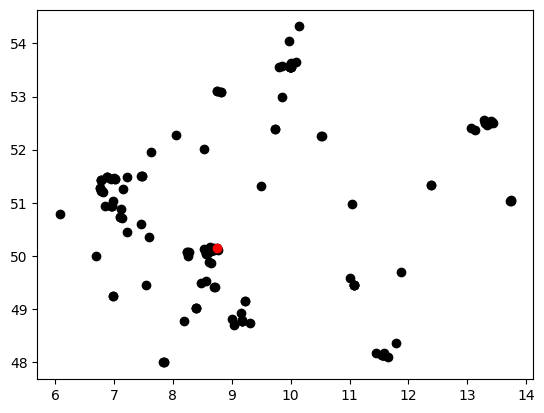

In [87]:
#use matplotlib to create a visualization of the stores
plt.scatter(x=de_data["Longitude"],y=de_data["Latitude"],color="black")
plt.scatter(x=start[1],y=start[0],color="red")
plt.show()

In [88]:
#Display with Folium
df=de_data.copy()


#rename latitude and longitdue columns
df.rename(columns={"Latitude":"y","Longitude": "x"},inplace=True)

#color the base depot on the map
color="base"
colors=["black","gold"]
popup = "id"

#base map
store_map=folium.Map(location=start,tiles="cartodbpositron",zoom_start=11,attr="Mne")

#adding colors
elements = sorted(list(df[color].unique()))
df["color"]=df[color].apply(lambda x:colors[elements.index(x)])

#add groupings
# df.apply(lambda row: 
#       folium.CircleMarker(
#             location =[row["y"],row["x"]],popup=row[popup],
#                                          color=row["color"],fill=True,radius=5).add_to(store_map))

for index, row in df.iterrows():
      folium.CircleMarker(
                  location =[row["y"],row["x"]],popup=row[popup],
                                          color=row["color"],fill=True,radius=5).add_to(store_map)


# add full-screen button
plugins.Fullscreen(position="topright", title="Expand", 
      title_cancel="Exit", force_separate_button=True).add_to(store_map)

#show
store_map


In [89]:
#adding lines
# add lines
for i in range(len(df)):
    points = [start, df[["y","x"]].iloc[i].tolist()]
    folium.PolyLine(points, tooltip="Coast", color="red", 
                    weight=0.5, opacity=0.5).add_to(store_map)

In [90]:
store_map

In [91]:
#optional map changes
layers = ["cartodbpositron", "openstreetmap", "Stamen Terrain","Stamen Water Color", "Stamen Toner", "cartodbdark_matter"]
for tile in layers:
    folium.TileLayer(tile,attr="We").add_to(store_map)
folium.LayerControl(position='bottomright').add_to(store_map)

In [92]:
store_map

## Shortest Path.

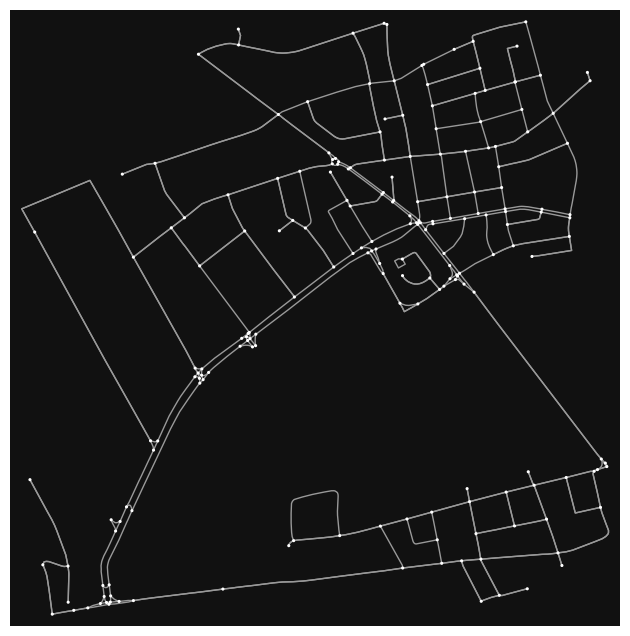

In [93]:
#query OSM(open street map) to create NetworkX graphs
G = ox.graph_from_point(start,dist=1000,network_type="drive")
G =ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

#plot
fig,ax =ox.plot_graph(G,node_size=5,node_color="white",figsize=(16,8))

In [94]:
# geo-dataframe (nodes)
print("nodes:", len(G.nodes()))
ox.graph_to_gdfs(G, nodes=True, edges=False).reset_index().head(3)

nodes: 203


,osmid,y,x,street_count,highway,ref,geometry
0,30416066,50.139510,8.747281,4,NaN,NaN,POINT (8.74728 50.13951)
1,31079656,50.131396,8.738242,3,NaN,NaN,POINT (8.73824 50.13140)
2,31079658,50.131689,8.740864,4,NaN,NaN,POINT (8.74086 50.13169)


In [95]:
# geo-dataframe (links)
print("links:", len(G.edges()))
ox.graph_to_gdfs(G, nodes=False, edges=True).reset_index().head(3)

links: 425


,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,speed_kph,travel_time,geometry,bridge,access,junction,width
0,30416066,31998331,0,227022311,True,2,K 870,Borsigallee,secondary,50,False,10.147,50.0,0.7,"LINESTRING (8.74728 50.13951, 8.74739 50.13957)",NaN,NaN,NaN,NaN
1,30416066,2304924859,0,7976454,True,2,A 66,NaN,motorway,none,False,26.402,46.3,2.1,"LINESTRING (8.74728 50.13951, 8.74736 50.13944...",NaN,NaN,NaN,NaN
2,31079656,34452592,0,1155267453,False,2,K 870,Am Erlenbruch,secondary,30,False,72.068,30.0,8.6,"LINESTRING (8.73824 50.13140, 8.73854 50.13143...",NaN,NaN,NaN,NaN


In [96]:
de_data

,id,index,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,base
0,0,4888,Starbucks,40948-102601,Stern Center Potsdam,Company Owned,NUTHESTRAßE / STERNSTRAßE,POTSDAM,BB,DE,14480,4933160037192,GMT+1:00 Europe/Berlin,13.13,52.37,0
1,1,4889,Starbucks,40947-102602,Brandenburgerstrasse 28a,Company Owned,"BRANDENBURGER STRAß 28A, ALEXA",POTSDAM,BB,DE,14467,493312019631,GMT+1:00 Europe/Berlin,13.06,52.40,0
2,2,4890,Starbucks,40971-108228,Alexa Shopping Centre,Company Owned,GRUNERSTRASSE 20,BERLIN,BE,DE,10719,493027591054,GMT+1:00 Europe/Berlin,13.42,52.52,0
3,3,4891,Starbucks,40949-103780,Potsdamer Platz 5,Company Owned,"POTSDAMER PLATZ 5, Sony-Center",BERLIN,BE,DE,10785,493025358285,GMT+1:00 Europe/Berlin,13.38,52.51,0
4,4,4892,Starbucks,18524-185885,Sony-Center,Company Owned,Neue Potsdamer Str. 2,Berlin,BE,DE,10785,3023003314,GMT+1:00 Europe/Berlin,13.37,52.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,5043,Starbucks,20604-161924,Dresden Hauptbahnhof,Company Owned,Wiener Platz 4,Dresden,SN,DE,1069,4935142776967,GMT+1:00 Europe/Berlin,13.73,51.04,0
156,156,5044,Starbucks,1197-133645,Centrum Galerie,Company Owned,Prager Strasse 15,Dresden,SN,DE,1069,493514850950,GMT+1:00 Europe/Berlin,13.74,51.04,0
157,157,5045,Starbucks,17860-181705,Leipzig Hauptbahnhof,Company Owned,Willy-Brandt-Platz 7,Leipzig,SN,DE,4109,4934196298335,GMT+1:00 Europe/Berlin,12.38,51.34,0
158,158,5046,Starbucks,40999-115960,Grimmaische Strasse 14,Company Owned,GRIMMAISCHE STRASSE 14,LEIPZIG,SN,DE,4109,493412251481,GMT+1:00 Europe/Berlin,12.38,51.34,0


In [97]:
#run a small simulation 
end = de_data[de_data["id"]==68][["Longitude","Latitude"]].values[0]
print("locations: from", start, "--> to", end) 

locations: from [50.14  8.75] --> to [ 8.56 50.03]


In [98]:
start

array([50.14,  8.75])

In [99]:
#node values
start_node = ox.distance.nearest_nodes(G, start[0], start[1])
end_node = ox.distance.nearest_nodes(G, end[0], end[1])
print("nodes: from", start_node, "--> to", end_node)

nodes: from 34680877 --> to 31079656


[34680877, 31996619, 34680849, 31996605, 34680861, 34680864, 34680899, 31079693, 1306008168, 1306008531, 673428700, 1306008332, 31079692, 34452592, 31079656]


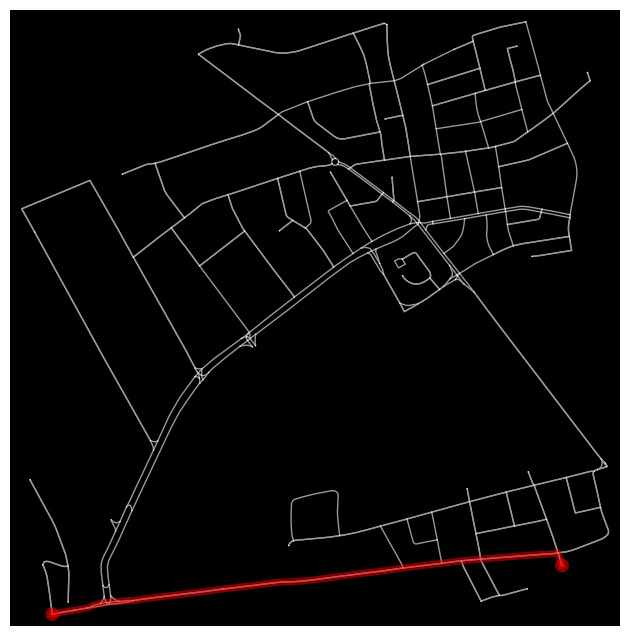

In [100]:
# calculate shortest path
path_length = nx.shortest_path(G, source=start_node, target=end_node, 
                                method='dijkstra', weight='length')     
print(path_length)

# plot on the graph
fig, ax = ox.plot_graph_route(G, path_length, route_color="red", 
                              route_linewidth=5, node_size=1, 
                              bgcolor='black', node_color="white", 
                              figsize=(16,8))

### Optimize for time

[34680877, 31996619, 34680849, 31996605, 34680861, 34680864, 34680899, 31079693, 1306008168, 1306008531, 673428700, 1306008332, 31079692, 34452592, 31079656]


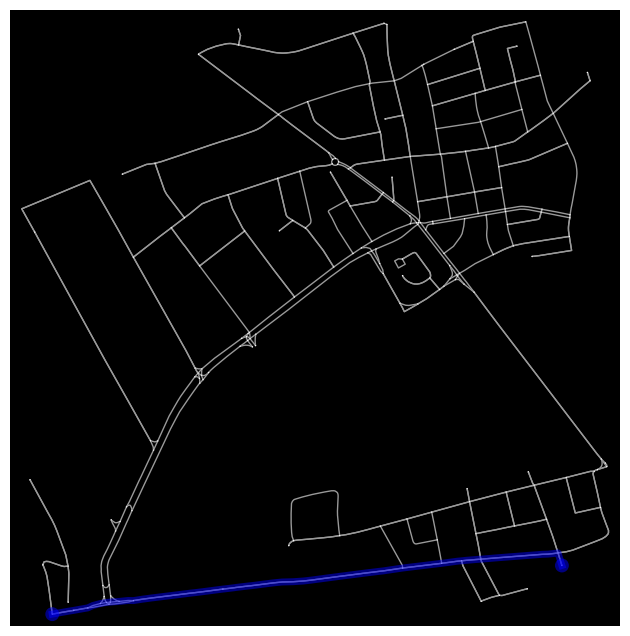

In [101]:
# calculate shortest path
path_time = nx.shortest_path(G, source=start_node, target=end_node, 
                              method='dijkstra', weight='travel_time')   
print(path_time)

# plot on the graph
fig, ax = ox.plot_graph_route(G, path_time, route_color="blue", 
                              route_linewidth=5, node_size=1, 
                              bgcolor='black', node_color="white", 
                              figsize=(16,8))

### OPtimize for both

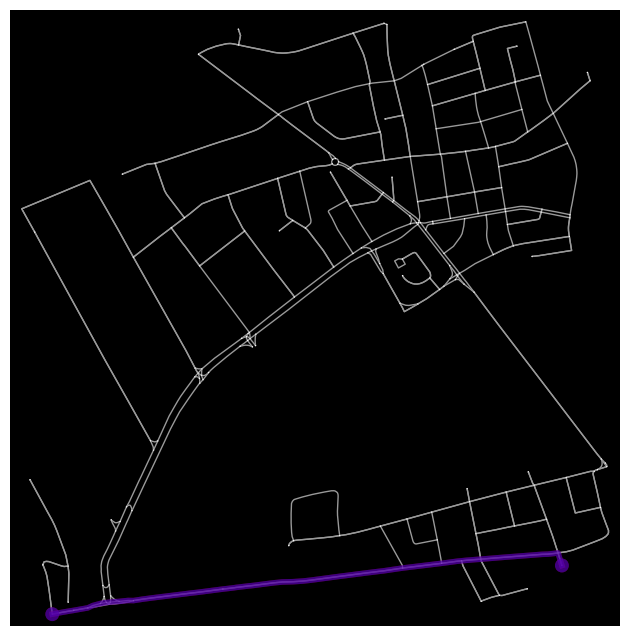

In [102]:
# plot on the graph
fig, ax = ox.plot_graph_routes(G, routes=[path_length, path_time], 
                              route_colors=["red","blue"], 
                              route_linewidth=5, node_size=1, 
                              bgcolor='black', node_color="white", 
                              figsize=(16,8))

In [103]:
# plot on the map
ox.plot_route_folium(G, route=path_length, route_map=store_map, 
                     color="red", weight=1)
ox.plot_route_folium(G, route=path_time, route_map=store_map, 
                     color="blue", weight=1)
store_map

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\2877194716.py:2: UserWarning:

The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\2877194716.py:4: UserWarning:

The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.



In [104]:
lst_start, lst_end = [],[]
start_x, start_y = [],[]
end_x, end_y = [],[]
lst_length, lst_time = [],[]

for a,b in zip(path_time[:-1], path_time[1:]):
    lst_start.append(a)
    lst_end.append(b)
    lst_length.append(round(G.edges[(a,b,0)]['length']))
    lst_time.append(round(G.edges[(a,b,0)]['travel_time']))
    start_x.append(G.nodes[a]['x'])
    start_y.append(G.nodes[a]['y'])
    end_x.append(G.nodes[b]['x'])
    end_y.append(G.nodes[b]['y'])

df = pd.DataFrame(list(zip(lst_start, lst_end, 
                           start_x, start_y, end_x, end_y, 
                           lst_length, lst_time)), 
                   columns=["start","end","start_x","start_y",
                            "end_x","end_y","length","travel_time"]
                  ).reset_index().rename(columns={"index":"id"})

df.head()

,id,start,end,start_x,start_y,end_x,end_y,length,travel_time
0,0,34680877,31996619,8.761821,50.132839,8.761641,50.133213,43,5
1,1,31996619,34680849,8.761641,50.133213,8.758073,50.133026,255,18
2,2,34680849,31996605,8.758073,50.133026,8.757181,50.132978,64,5
3,3,31996605,34680861,8.757181,50.132978,8.756260,50.132904,66,5
4,4,34680861,34680864,8.756260,50.132904,8.754454,50.132764,130,9


In [105]:
## create start/end df 
df_start = df[df["start"] == start_node]
df_end = df[df["end"] == end_node]

## create basic map
fig = px.scatter_mapbox(data_frame=df, lon="start_x", lat="start_y", 
                        zoom=15, width=1000, height=800, 
                        animation_frame="id", 
                        mapbox_style="carto-positron")
## add driver
fig.data[0].marker = {"size":12}
## add start point
fig.add_trace(px.scatter_mapbox(data_frame=df_start, 
                                lon="start_x", lat="start_y").data[0])
fig.data[1].marker = {"size":15, "color":"red"}
## add end point
fig.add_trace(px.scatter_mapbox(data_frame=df_end, 
                                lon="start_x", lat="start_y").data[0])
fig.data[2].marker = {"size":15, "color":"green"}
## add route
fig.add_trace(px.line_mapbox(data_frame=df, 
                             lon="start_x", lat="start_y").data[0])
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'id=0<br>start_y=%{lat}<br>start_x=%{lon}<extra></extra>',
              'lat': array([50.1328392]),
              'legendgroup': '',
              'lon': array([8.7618213]),
              'marker': {'size': 12},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'type': 'scattermapbox'},
             {'hovertemplate': 'start_y=%{lat}<br>start_x=%{lon}<extra></extra>',
              'lat': array([50.1328392]),
              'legendgroup': '',
              'lon': array([8.7618213]),
              'marker': {'color': 'red', 'size': 15},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'type': 'scattermapbox'},
             {'hovertemplate': 'start_y=%{lat}<br>start_x=%{lon}<extra></extra>',
              'lat': array([50.1315084]),
              'legendgroup': '',
              'lon': array([8.7392377]),
              'marker': {'color': 'green', 'size': 15},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'type': 'scattermapbox'},
             {'hovertemplate': 'start_y=%{lat}<br>start_x=%{lon}<extra></extra>',
              'lat': array([50.1328392, 50.1332129, 50.1330265, 50.132978 , 50.1329037, 50.1327639,
                            50.1321398, 50.1317982, 50.1317732, 50.1317535, 50.1317417, 50.1317117,
                            50.131582 , 50.1315084]),
              'legendgroup': '',
              'line': {'color': '#636efa'},
              'lon': array([8.7618213, 8.761641 , 8.758073 , 8.7571812, 8.7562603, 8.7544537,
                            8.746136 , 8.7419961, 8.7413336, 8.7409274, 8.7407518, 8.7404686,
                            8.7398875, 8.7392377]),
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'type': 'scattermapbox'}],
    'frames': [{'data': [{'hovertemplate': 'id=0<br>start_y=%{lat}<br>start_x=%{lon}<extra></extra>',
                          'lat': array([50.1328392]),
                          'legendgroup': '',
                          'lon': array([8.7618213]),
                          'marker': {'color': '#636efa'},
                          'mode': 'markers',
                          'name': '',
                          'showlegend': False,
                          'subplot': 'mapbox',
                          'type': 'scattermapbox'}],
                'name': '0'},
               {'data': [{'hovertemplate': 'id=1<br>start_y=%{lat}<br>start_x=%{lon}<extra></extra>',
                          'lat': array([50.1332129]),
                          'legendgroup': '',
                          'lon': array([8.761641]),
                          'marker': {'color': '#636efa'},
                          'mode': 'markers',
                          'name': '',
                          'showlegend': False,
                          'subplot': 'mapbox',
                          'type': 'scattermapbox'}],
                'name': '1'},
               {'data': [{'hovertemplate': 'id=2<br>start_y=%{lat}<br>start_x=%{lon}<extra></extra>',
                          'lat': array([50.1330265]),
                          'legendgroup': '',
                          'lon': array([8.758073]),
                          'marker': {'color': '#636efa'},
                          'mode': 'markers',
                          'name': '',
                          'showlegend': False,
                          'subplot': 'mapbox',
                          'type': 'scattermapbox'}],
                'name': '2'},
               {'data': [{'hovertemplate': 'id=3<br>start_y=%{lat}<br>start_x=%{lon}<extra></extra>',
                          'lat': array([50.132978]),
                          'legendgroup': '',

# Entire Dataset Optimization

In [112]:
de_data["node"]=de_data[["Longitude","Latitude"]].apply(lambda x: ox.distance.nearest_nodes(G,x[0],x[1]),axis=1)
# de_data = de_data.drop_duplicates("node",keep="first")

de_data.head()

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\1683478557.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\1683478557.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\1683478557.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\1683478557.py:1: FutureWarning:

Series.__getitem__

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\1683478557.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\1683478557.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\1683478557.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\blais\AppData\Local\Temp\ipykernel_3180\1683478557.py:1: FutureWarning:

Series.__getitem__

,id,index,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,base,node
0,0,4888,Starbucks,40948-102601,Stern Center Potsdam,Company Owned,NUTHESTRAßE / STERNSTRAßE,POTSDAM,BB,DE,14480,4933160037192,GMT+1:00 Europe/Berlin,13.13,52.37,0,7656251359
1,1,4889,Starbucks,40947-102602,Brandenburgerstrasse 28a,Company Owned,"BRANDENBURGER STRAß 28A, ALEXA",POTSDAM,BB,DE,14467,493312019631,GMT+1:00 Europe/Berlin,13.06,52.40,0,7656251359
2,2,4890,Starbucks,40971-108228,Alexa Shopping Centre,Company Owned,GRUNERSTRASSE 20,BERLIN,BE,DE,10719,493027591054,GMT+1:00 Europe/Berlin,13.42,52.52,0,7656251359
3,3,4891,Starbucks,40949-103780,Potsdamer Platz 5,Company Owned,"POTSDAMER PLATZ 5, Sony-Center",BERLIN,BE,DE,10785,493025358285,GMT+1:00 Europe/Berlin,13.38,52.51,0,7656251359
4,4,4892,Starbucks,18524-185885,Sony-Center,Company Owned,Neue Potsdamer Str. 2,Berlin,BE,DE,10785,3023003314,GMT+1:00 Europe/Berlin,13.37,52.51,0,7656251359


In [113]:
de_data

,id,index,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,base,node
0,0,4888,Starbucks,40948-102601,Stern Center Potsdam,Company Owned,NUTHESTRAßE / STERNSTRAßE,POTSDAM,BB,DE,14480,4933160037192,GMT+1:00 Europe/Berlin,13.13,52.37,0,7656251359
1,1,4889,Starbucks,40947-102602,Brandenburgerstrasse 28a,Company Owned,"BRANDENBURGER STRAß 28A, ALEXA",POTSDAM,BB,DE,14467,493312019631,GMT+1:00 Europe/Berlin,13.06,52.40,0,7656251359
2,2,4890,Starbucks,40971-108228,Alexa Shopping Centre,Company Owned,GRUNERSTRASSE 20,BERLIN,BE,DE,10719,493027591054,GMT+1:00 Europe/Berlin,13.42,52.52,0,7656251359
3,3,4891,Starbucks,40949-103780,Potsdamer Platz 5,Company Owned,"POTSDAMER PLATZ 5, Sony-Center",BERLIN,BE,DE,10785,493025358285,GMT+1:00 Europe/Berlin,13.38,52.51,0,7656251359
4,4,4892,Starbucks,18524-185885,Sony-Center,Company Owned,Neue Potsdamer Str. 2,Berlin,BE,DE,10785,3023003314,GMT+1:00 Europe/Berlin,13.37,52.51,0,7656251359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,5043,Starbucks,20604-161924,Dresden Hauptbahnhof,Company Owned,Wiener Platz 4,Dresden,SN,DE,1069,4935142776967,GMT+1:00 Europe/Berlin,13.73,51.04,0,7656251360
156,156,5044,Starbucks,1197-133645,Centrum Galerie,Company Owned,Prager Strasse 15,Dresden,SN,DE,1069,493514850950,GMT+1:00 Europe/Berlin,13.74,51.04,0,7656251360
157,157,5045,Starbucks,17860-181705,Leipzig Hauptbahnhof,Company Owned,Willy-Brandt-Platz 7,Leipzig,SN,DE,4109,4934196298335,GMT+1:00 Europe/Berlin,12.38,51.34,0,7656251359
158,158,5046,Starbucks,40999-115960,Grimmaische Strasse 14,Company Owned,GRIMMAISCHE STRASSE 14,LEIPZIG,SN,DE,4109,493412251481,GMT+1:00 Europe/Berlin,12.38,51.34,0,7656251359
